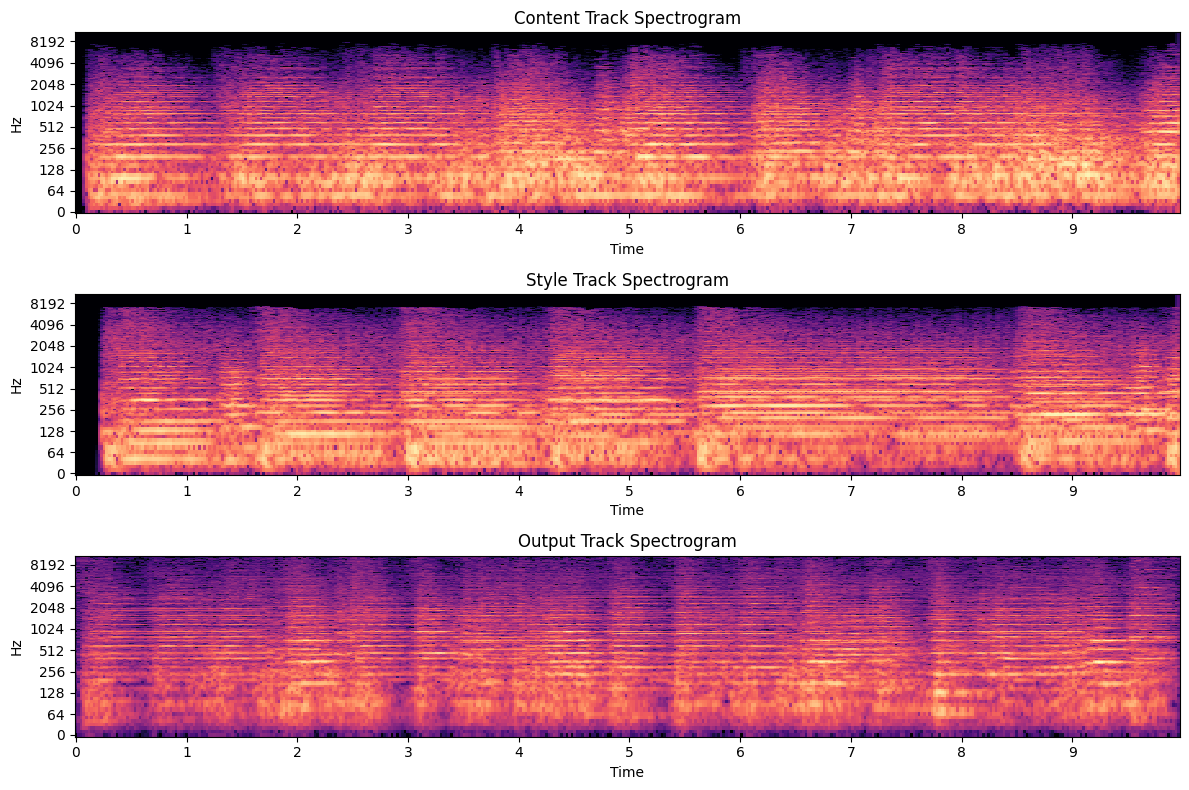

In [37]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Carica le tracce audio
input_track1, sr = librosa.load('imperial.mp3', sr=None)
input_track2, sr = librosa.load('usa.mp3', sr=None)
output_track, sr = librosa.load('imperial_usa.wav', sr=None)

# Assicurati che le tracce abbiano la stessa lunghezza
min_length = min(len(input_track1), len(input_track2), len(output_track))
input_track1 = input_track1[:min_length]
input_track2 = input_track2[:min_length]
output_track = output_track[:min_length]

# Calcola gli spettrogrammi
input_spec1 = np.abs(librosa.stft(input_track1))
input_spec2 = np.abs(librosa.stft(input_track2))
output_spec = np.abs(librosa.stft(output_track))

# Visualizza gli spettrogrammi
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(input_spec1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Content Track Spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(input_spec2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Style Track Spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(output_spec, ref=np.max), y_axis='log', x_axis='time')
plt.title('Output Track Spectrogram')

plt.tight_layout()
plt.show()


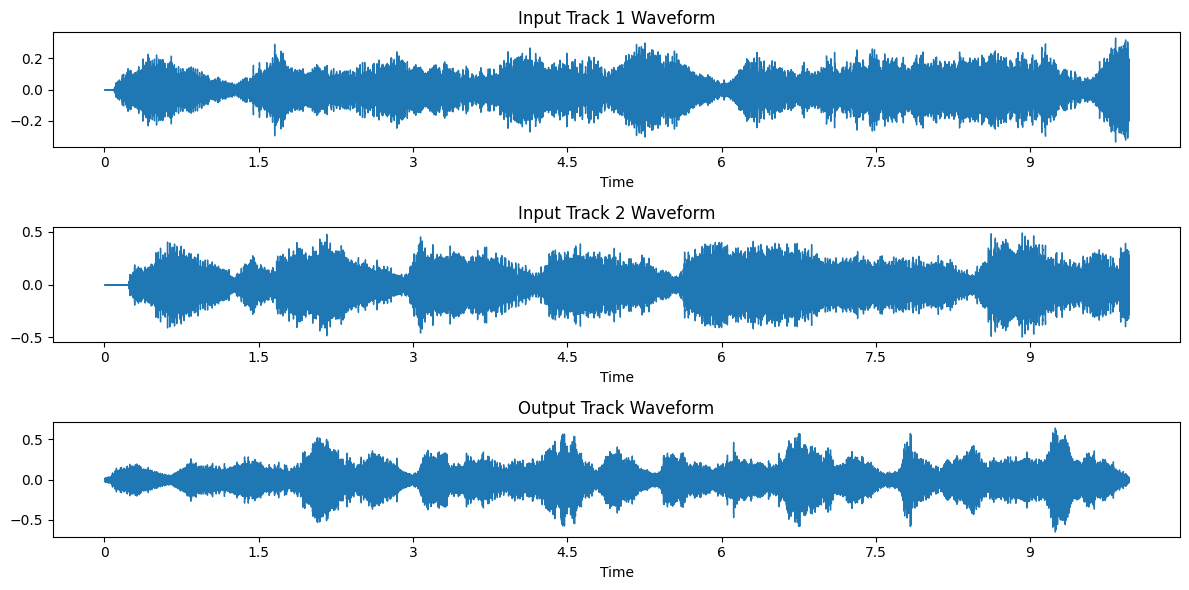

In [2]:
# Visualizza le forme d'onda
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.waveshow(input_track1, sr=sr)
plt.title('Input Track 1 Waveform')

plt.subplot(3, 1, 2)
librosa.display.waveshow(input_track2, sr=sr)
plt.title('Input Track 2 Waveform')

plt.subplot(3, 1, 3)
librosa.display.waveshow(output_track, sr=sr)
plt.title('Output Track Waveform')

plt.tight_layout()
plt.show()

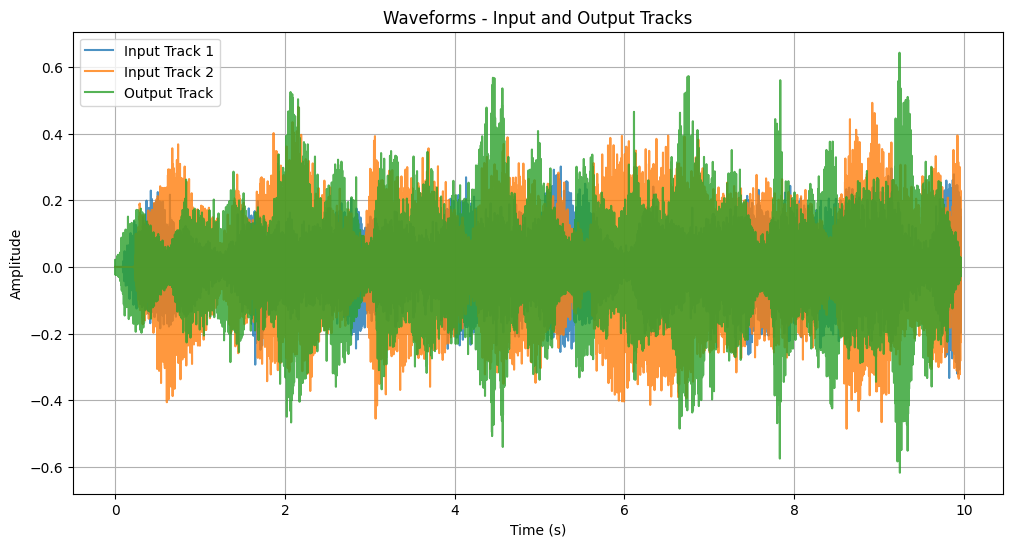

In [3]:
# Visualizza le forme d'onda sovrapposte
plt.figure(figsize=(12, 6))

plt.plot(np.linspace(0, len(input_track1) / sr, len(input_track1)), input_track1, label='Input Track 1', alpha=0.8)
plt.plot(np.linspace(0, len(input_track2) / sr, len(input_track2)), input_track2, label='Input Track 2', alpha=0.8)
plt.plot(np.linspace(0, len(output_track) / sr, len(output_track)), output_track, label='Output Track', alpha=0.8)

plt.title('Waveforms - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

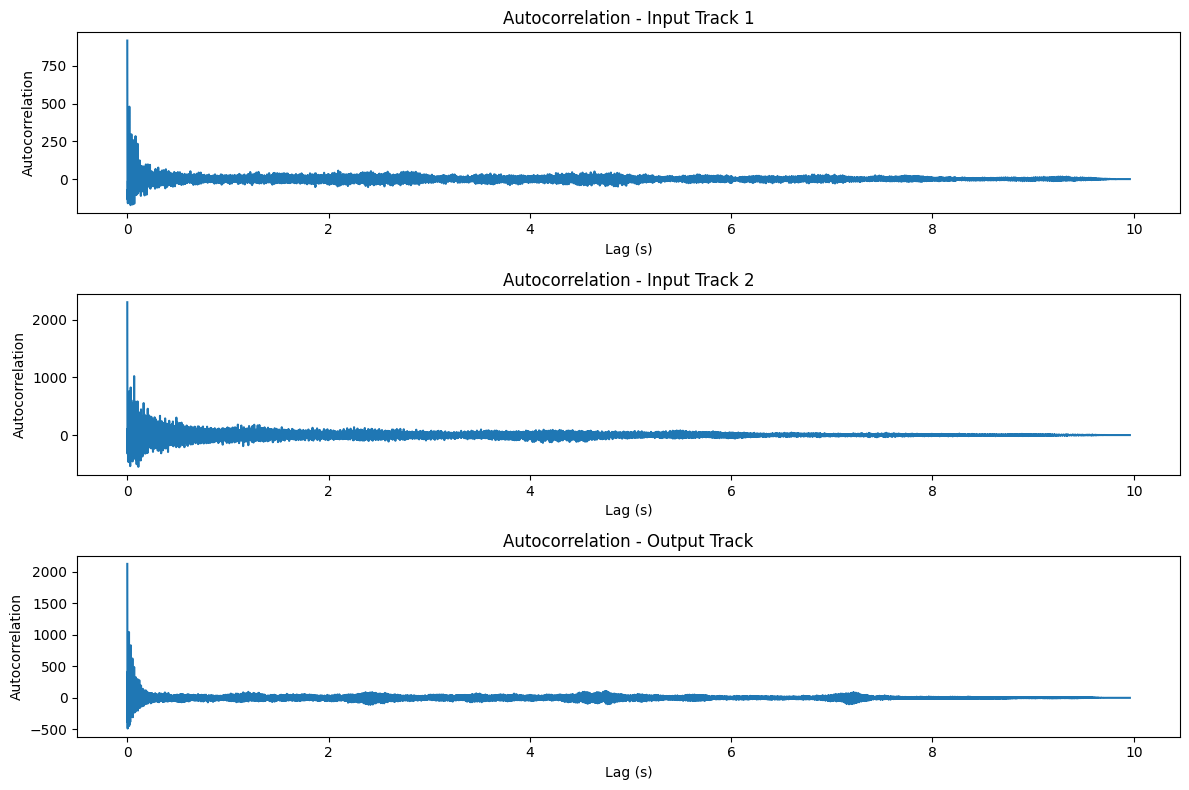

In [4]:

# Calcola la funzione di autocorrelazione
autocorr_input1 = librosa.autocorrelate(input_track1)
autocorr_input2 = librosa.autocorrelate(input_track2)
autocorr_output = librosa.autocorrelate(output_track)

# Visualizza la funzione di autocorrelazione
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(np.arange(len(autocorr_input1)) / sr, autocorr_input1)
plt.title('Autocorrelation - Input Track 1')
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(autocorr_input2)) / sr, autocorr_input2)
plt.title('Autocorrelation - Input Track 2')
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(autocorr_output)) / sr, autocorr_output)
plt.title('Autocorrelation - Output Track')
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

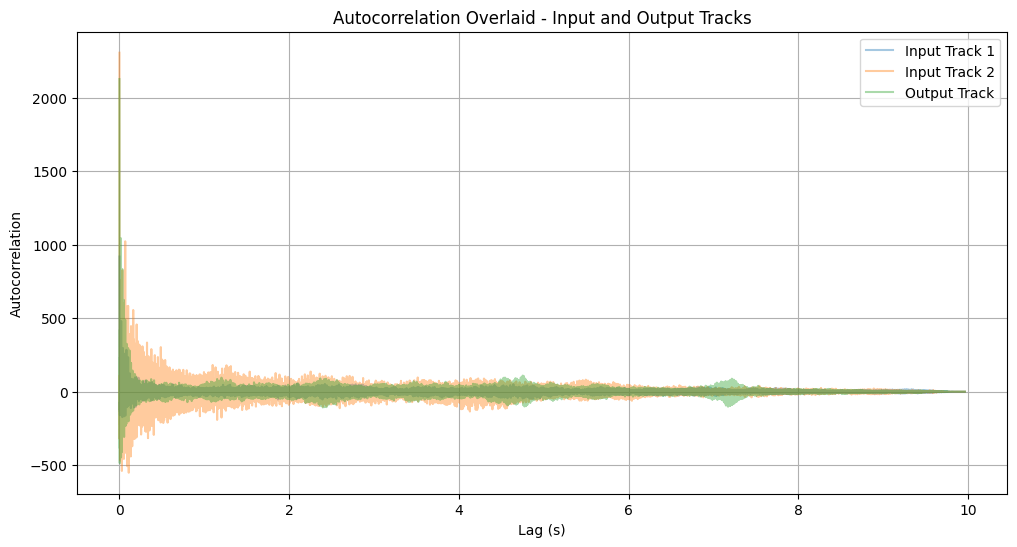

In [26]:
# Calcola la funzione di autocorrelazione
autocorr_input1 = librosa.autocorrelate(input_track1)
autocorr_input2 = librosa.autocorrelate(input_track2)
autocorr_output = librosa.autocorrelate(output_track)

# Visualizza la funzione di autocorrelazione sovrapposta
plt.figure(figsize=(12, 6))

plt.plot(np.arange(len(autocorr_input1)) / sr, autocorr_input1, label='Input Track 1', alpha=0.4)
plt.plot(np.arange(len(autocorr_input2)) / sr, autocorr_input2, label='Input Track 2', alpha=0.4)
plt.plot(np.arange(len(autocorr_output)) / sr, autocorr_output, label='Output Track', alpha=0.4)

plt.title('Autocorrelation Overlaid - Input and Output Tracks')
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()

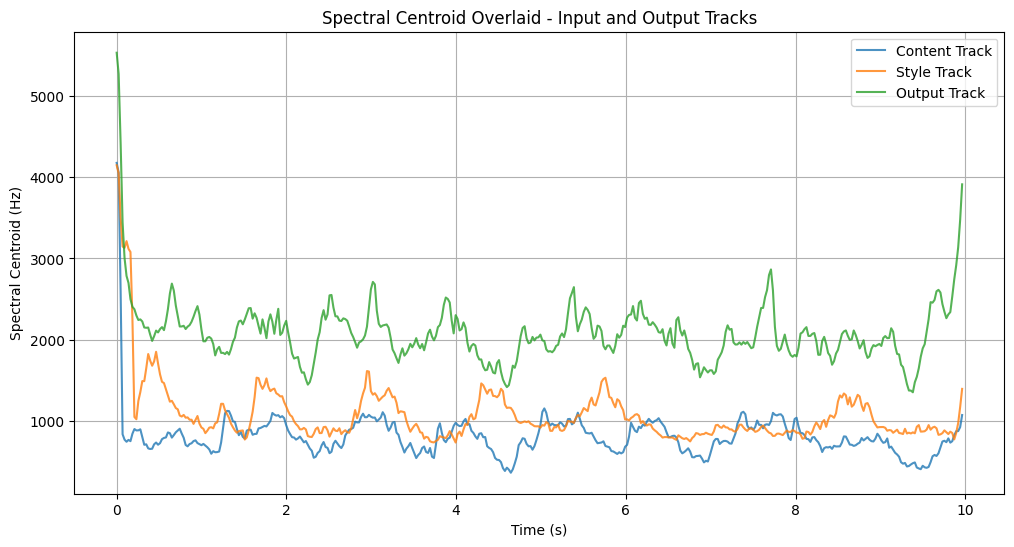

In [27]:
# Calcola i centroidi spettrali
centroid_input1 = librosa.feature.spectral_centroid(y=input_track1, sr=sr)[0]
centroid_input2 = librosa.feature.spectral_centroid(y=input_track2, sr=sr)[0]
centroid_output = librosa.feature.spectral_centroid(y=output_track, sr=sr)[0]

# Visualizza i centroidi spettrali sovrapposti
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(centroid_input1), centroid_input1, label='Content Track', alpha=0.8)
plt.plot(librosa.times_like(centroid_input2), centroid_input2, label='Style Track', alpha=0.8)
plt.plot(librosa.times_like(centroid_output), centroid_output, label='Output Track', alpha=0.8)

plt.title('Spectral Centroid Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid (Hz)')
plt.legend()
plt.grid(True)
plt.show()


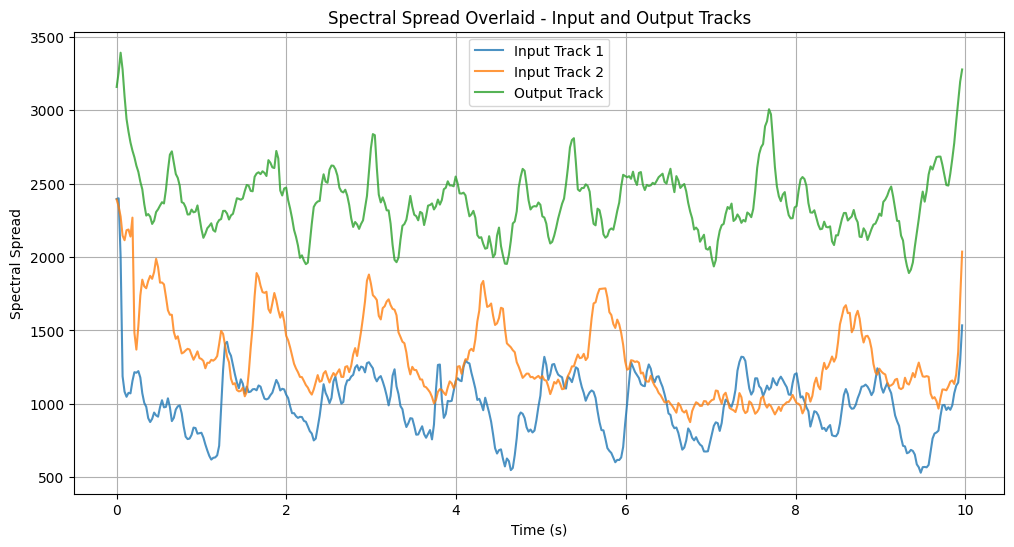

In [7]:
# Calcola la dispersione spettrale
spread_input1 = librosa.feature.spectral_bandwidth(y=input_track1, sr=sr)[0]
spread_input2 = librosa.feature.spectral_bandwidth(y=input_track2, sr=sr)[0]
spread_output = librosa.feature.spectral_bandwidth(y=output_track, sr=sr)[0]

# Visualizza le dispersioni spettrali sovrapposte
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(spread_input1), spread_input1, label='Input Track 1', alpha=0.8)
plt.plot(librosa.times_like(spread_input2), spread_input2, label='Input Track 2', alpha=0.8)
plt.plot(librosa.times_like(spread_output), spread_output, label='Output Track', alpha=0.8)

plt.title('Spectral Spread Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Spread')
plt.legend()
plt.grid(True)
plt.show()


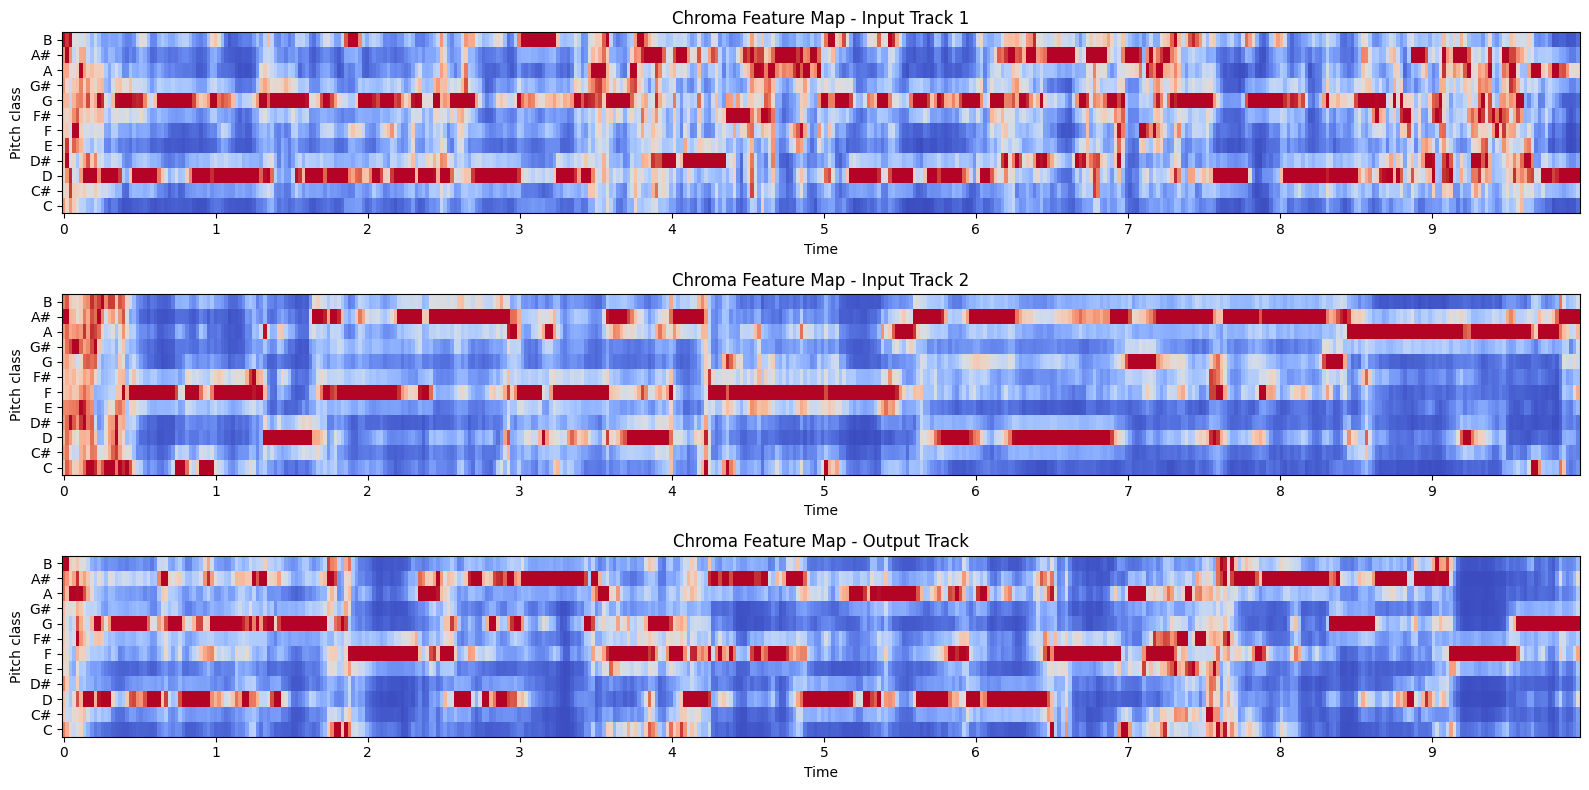

In [8]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Definisci i nomi dei semitoni
semitone_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Calcola le Chroma Feature Maps
chroma_input1 = librosa.feature.chroma_stft(y=input_track1, sr=sr)
chroma_input2 = librosa.feature.chroma_stft(y=input_track2, sr=sr)
chroma_output = librosa.feature.chroma_stft(y=output_track, sr=sr)

# Visualizza le Chroma Feature Maps sovrapposte
plt.figure(figsize=(16, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(chroma_input1, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Input Track 1')
plt.yticks(np.arange(12), semitone_names)

plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_input2, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Input Track 2')
plt.yticks(np.arange(12), semitone_names)

plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_output, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Output Track')
plt.yticks(np.arange(12), semitone_names)

plt.tight_layout()
plt.show()


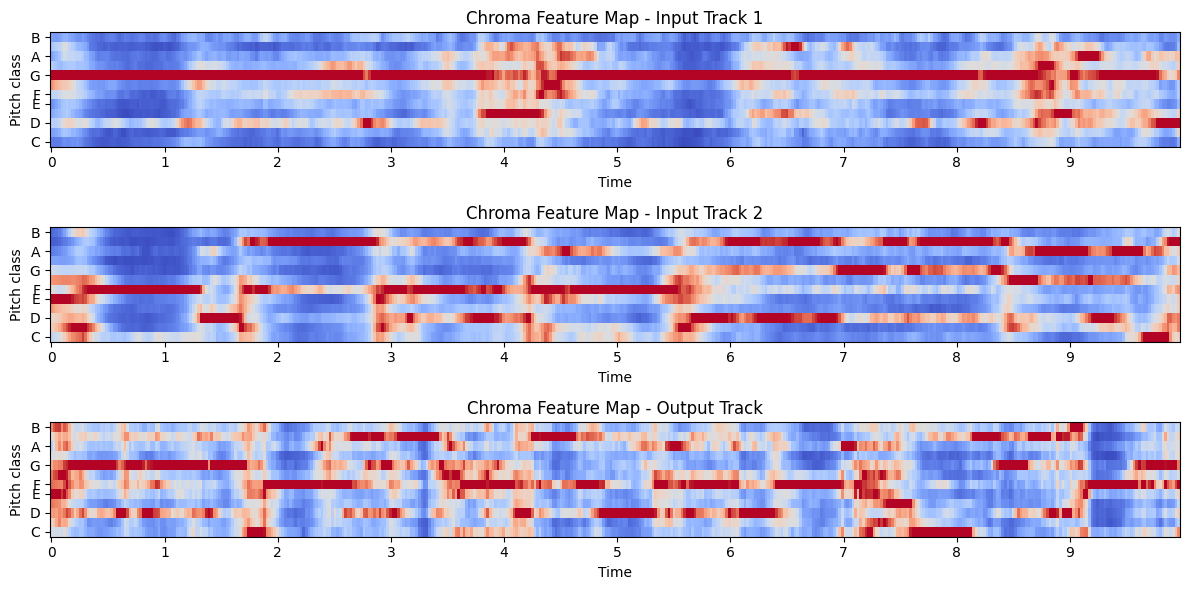

In [9]:
# Calcola le Chroma Feature Maps utilizzando chroma_cqt
chroma_input1 = librosa.feature.chroma_cqt(y=input_track1, sr=sr)
chroma_input2 = librosa.feature.chroma_cqt(y=input_track2, sr=sr)
chroma_output = librosa.feature.chroma_cqt(y=output_track, sr=sr)

# Visualizza le Chroma Feature Maps sovrapposte
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(chroma_input1, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Input Track 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_input2, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Input Track 2')

plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_output, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.title('Chroma Feature Map - Output Track')

plt.tight_layout()
plt.show()

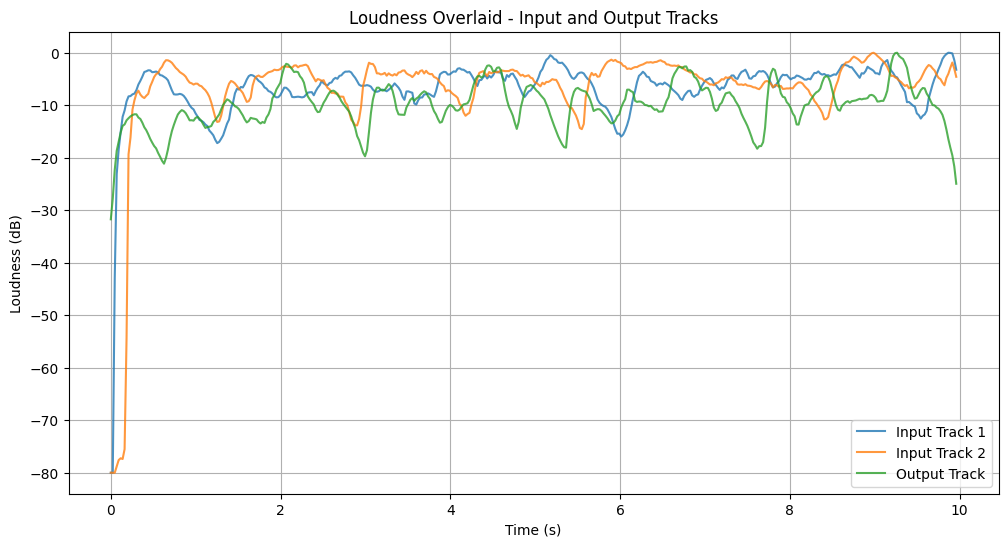

In [10]:
# Calcola il Loudness
loudness_input1 = librosa.amplitude_to_db(librosa.feature.rms(y=input_track1), ref=np.max)[0]
loudness_input2 = librosa.amplitude_to_db(librosa.feature.rms(y=input_track2), ref=np.max)[0]
loudness_output = librosa.amplitude_to_db(librosa.feature.rms(y=output_track), ref=np.max)[0]

# Visualizza i Loudness sovrapposti
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(loudness_input1), loudness_input1, label='Input Track 1', alpha=0.8)
plt.plot(librosa.times_like(loudness_input2), loudness_input2, label='Input Track 2', alpha=0.8)
plt.plot(librosa.times_like(loudness_output), loudness_output, label='Output Track', alpha=0.8)

plt.title('Loudness Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Loudness (dB)')
plt.legend()
plt.grid(True)
plt.show()


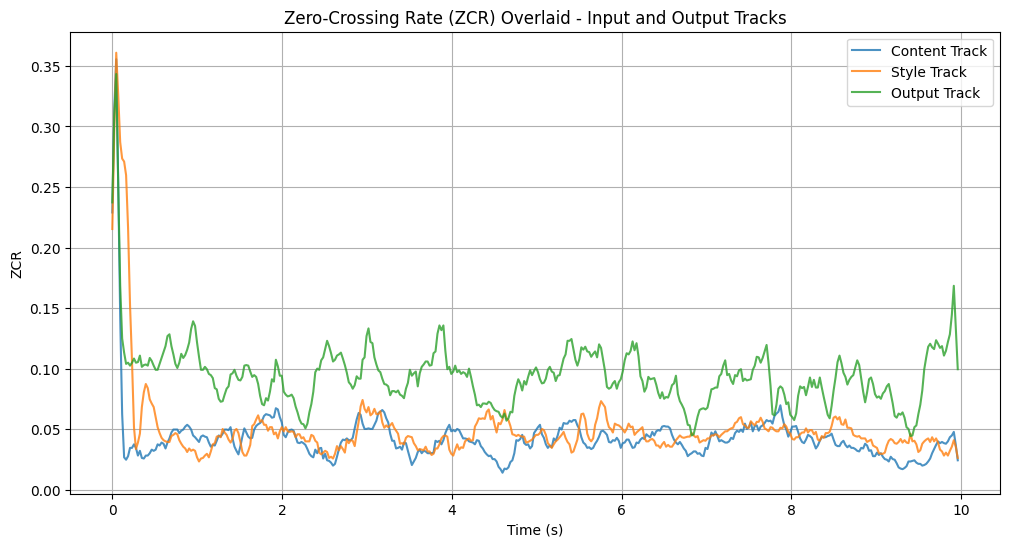

In [36]:
# Calcola il tasso di attraversamento dello zero (ZCR)
zcr_input1 = librosa.feature.zero_crossing_rate(input_track1)[0]
zcr_input2 = librosa.feature.zero_crossing_rate(input_track2)[0]
zcr_output = librosa.feature.zero_crossing_rate(output_track)[0]

# Visualizza i plot ZCR sovrapposti
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(zcr_input1), zcr_input1, label='Content Track', alpha=0.8)
plt.plot(librosa.times_like(zcr_input2), zcr_input2, label='Style Track', alpha=0.8)
plt.plot(librosa.times_like(zcr_output), zcr_output, label='Output Track', alpha=0.8)

plt.title('Zero-Crossing Rate (ZCR) Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.legend()
plt.grid(True)
plt.show()


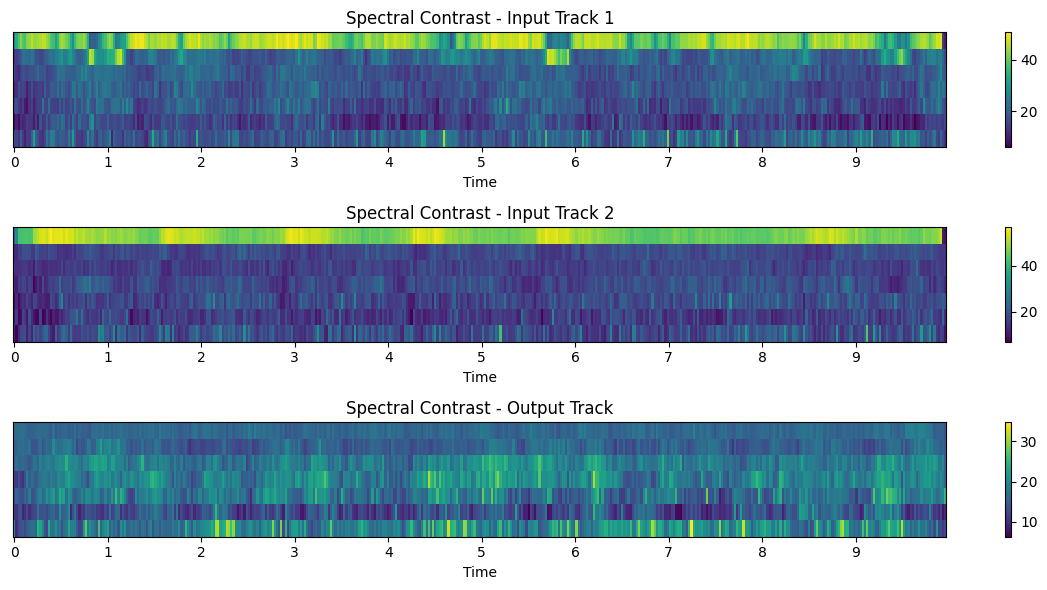

In [13]:
# Calcola lo spettro di contrasto
contrast_input1 = librosa.feature.spectral_contrast(y=input_track1, sr=sr)
contrast_input2 = librosa.feature.spectral_contrast(y=input_track2, sr=sr)
contrast_output = librosa.feature.spectral_contrast(y=output_track, sr=sr)

# Visualizza lo spettro di contrasto sovrapposto
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(contrast_input1, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Spectral Contrast - Input Track 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(contrast_input2, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Spectral Contrast - Input Track 2')

plt.subplot(3, 1, 3)
librosa.display.specshow(contrast_output, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Spectral Contrast - Output Track')

plt.tight_layout()
plt.show()


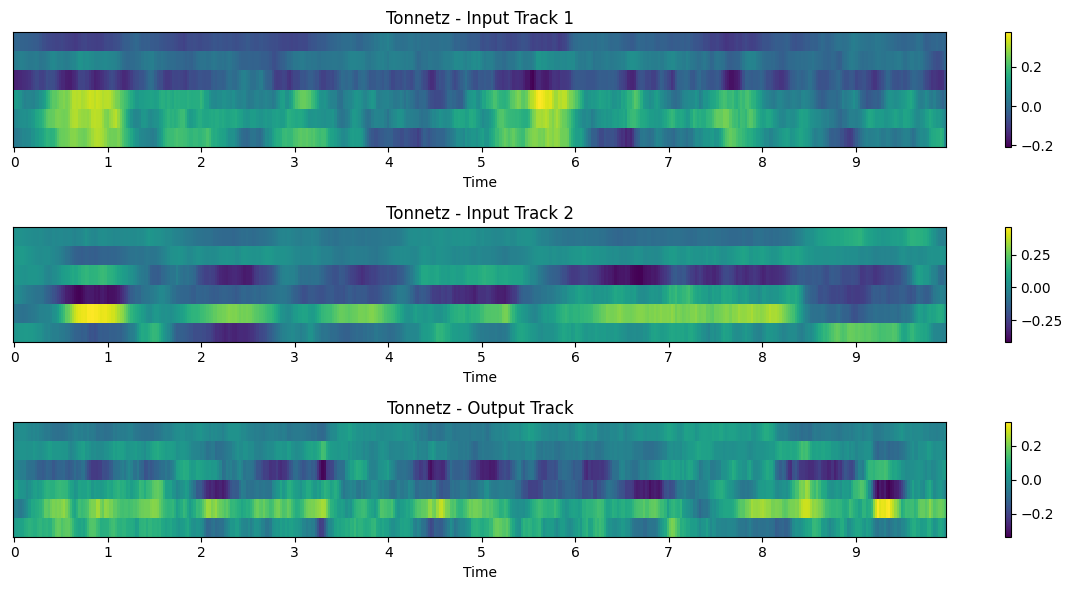

In [14]:
# Calcola le caratteristiche Tonnetz
tonnetz_input1 = librosa.feature.tonnetz(y=input_track1, sr=sr)
tonnetz_input2 = librosa.feature.tonnetz(y=input_track2, sr=sr)
tonnetz_output = librosa.feature.tonnetz(y=output_track, sr=sr)

# Visualizza le caratteristiche Tonnetz sovrapposte
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(tonnetz_input1, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Tonnetz - Input Track 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(tonnetz_input2, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Tonnetz - Input Track 2')

plt.subplot(3, 1, 3)
librosa.display.specshow(tonnetz_output, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Tonnetz - Output Track')

plt.tight_layout()
plt.show()


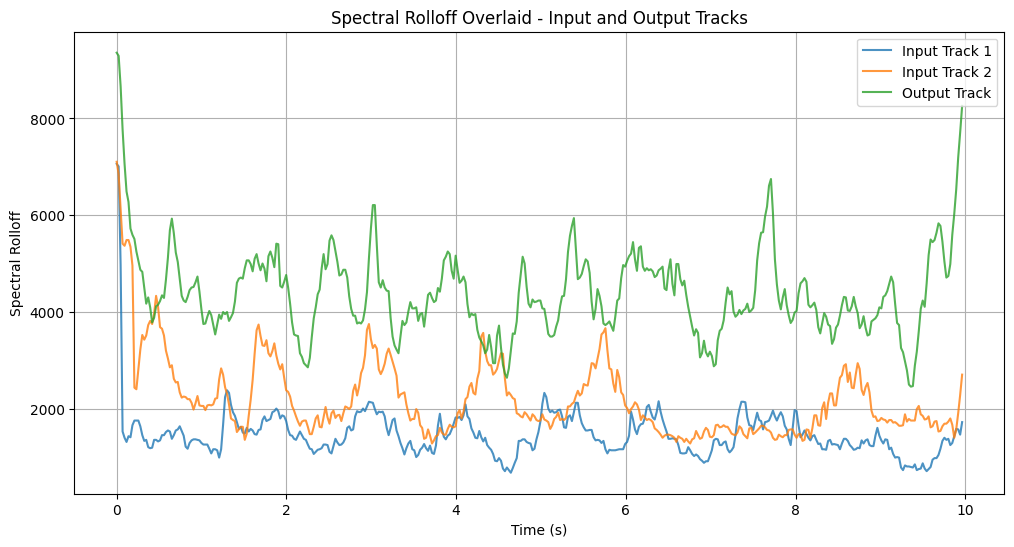

In [15]:
# Calcola lo spettro di rolloff
rolloff_input1 = librosa.feature.spectral_rolloff(y=input_track1, sr=sr)[0]
rolloff_input2 = librosa.feature.spectral_rolloff(y=input_track2, sr=sr)[0]
rolloff_output = librosa.feature.spectral_rolloff(y=output_track, sr=sr)[0]

# Visualizza lo spettro di rolloff sovrapposto
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(rolloff_input1), rolloff_input1, label='Input Track 1', alpha=0.8)
plt.plot(librosa.times_like(rolloff_input2), rolloff_input2, label='Input Track 2', alpha=0.8)
plt.plot(librosa.times_like(rolloff_output), rolloff_output, label='Output Track', alpha=0.8)

plt.title('Spectral Rolloff Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Rolloff')
plt.legend()
plt.grid(True)
plt.show()


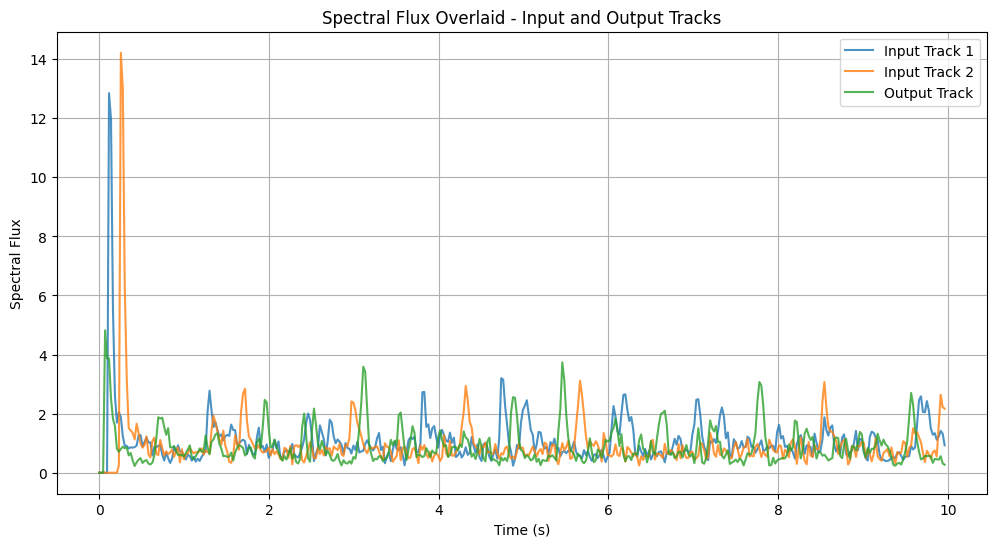

In [16]:
# Calcola lo spettro di flusso
flux_input1 = librosa.onset.onset_strength(y=input_track1, sr=sr)
flux_input2 = librosa.onset.onset_strength(y=input_track2, sr=sr)
flux_output = librosa.onset.onset_strength(y=output_track, sr=sr)

# Visualizza lo spettro di flusso sovrapposto
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(flux_input1), flux_input1, label='Input Track 1', alpha=0.8)
plt.plot(librosa.times_like(flux_input2), flux_input2, label='Input Track 2', alpha=0.8)
plt.plot(librosa.times_like(flux_output), flux_output, label='Output Track', alpha=0.8)

plt.title('Spectral Flux Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Flux')
plt.legend()
plt.grid(True)
plt.show()


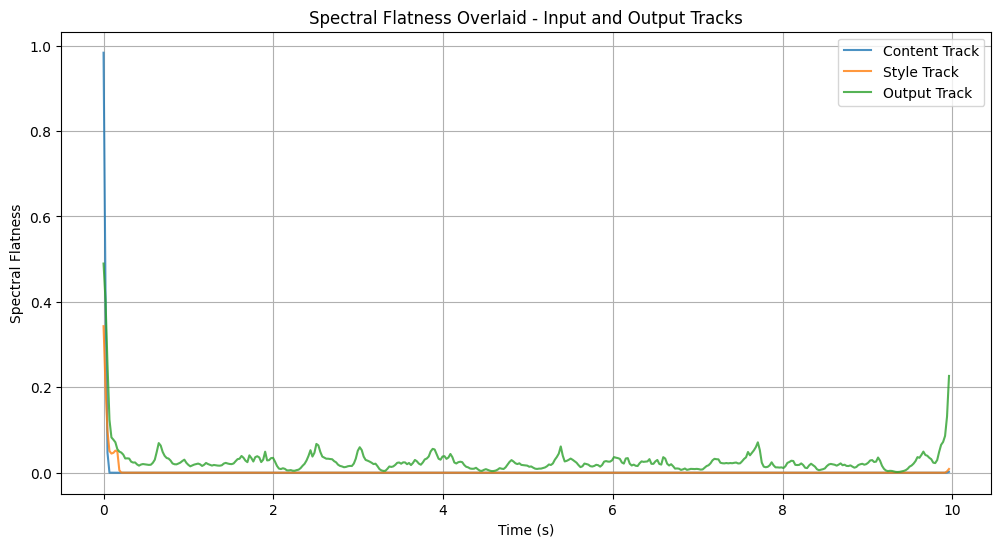

In [38]:
# Calcola la planarità spettrale
flatness_input1 = librosa.feature.spectral_flatness(y=input_track1)[0]
flatness_input2 = librosa.feature.spectral_flatness(y=input_track2)[0]
flatness_output = librosa.feature.spectral_flatness(y=output_track)[0]

# Visualizza la planarità spettrale sovrapposta
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(flatness_input1), flatness_input1, label='Content Track', alpha=0.8)
plt.plot(librosa.times_like(flatness_input2), flatness_input2, label='Style Track', alpha=0.8)
plt.plot(librosa.times_like(flatness_output), flatness_output, label='Output Track', alpha=0.8)

plt.title('Spectral Flatness Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Flatness')
plt.legend()
plt.grid(True)
plt.show()


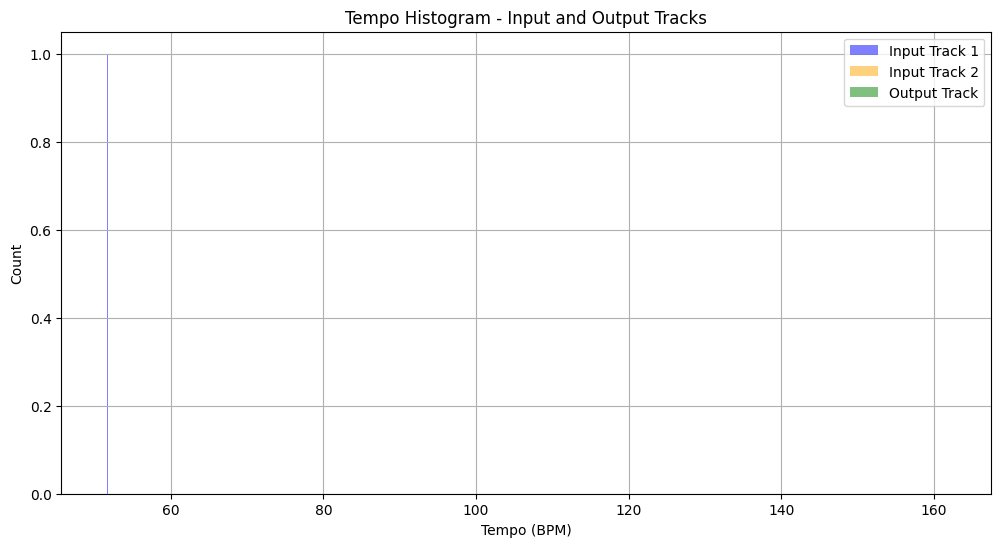

In [18]:
# Calcola il tempo dominante
tempo_input1, _ = librosa.beat.beat_track(y=input_track1, sr=sr)
tempo_input2, _ = librosa.beat.beat_track(y=input_track2, sr=sr)
tempo_output, _ = librosa.beat.beat_track(y=output_track, sr=sr)

# Visualizza gli istogrammi di tempo dominante
plt.figure(figsize=(12, 6))

plt.hist(tempo_input1, bins=30, alpha=0.5, label='Input Track 1', color='blue')
plt.hist(tempo_input2, bins=30, alpha=0.5, label='Input Track 2', color='orange')
plt.hist(tempo_output, bins=30, alpha=0.5, label='Output Track', color='green')

plt.title('Tempo Histogram - Input and Output Tracks')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


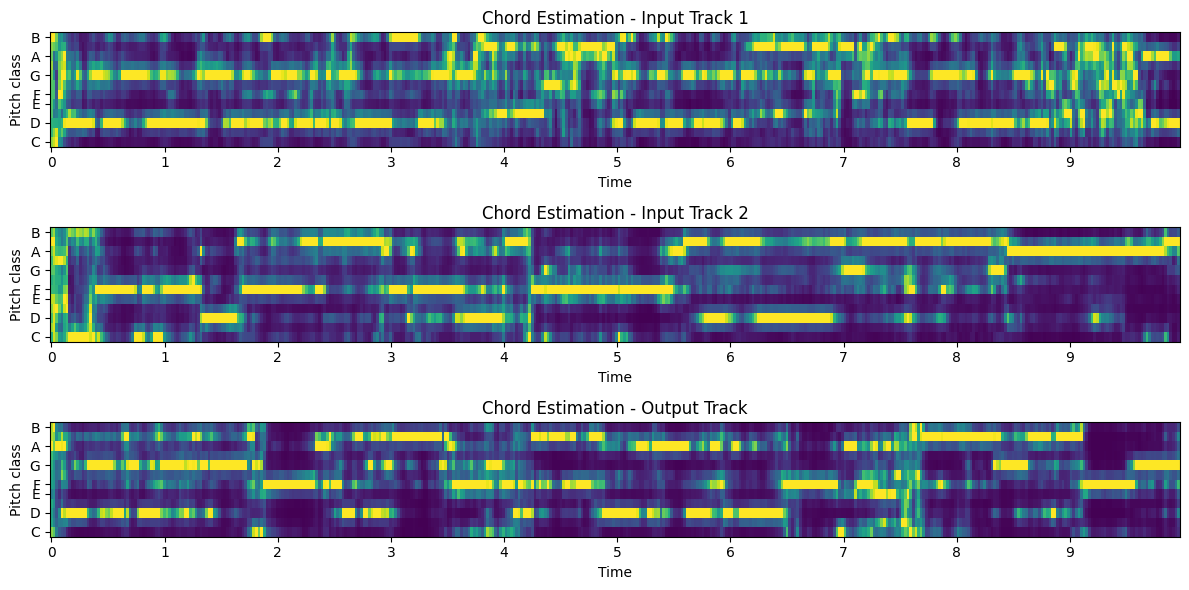

In [19]:
# Stima degli accordi
harmony_input1 = librosa.effects.harmonic(input_track1)
harmony_input2 = librosa.effects.harmonic(input_track2)
harmony_output = librosa.effects.harmonic(output_track)

# Estrai gli accordi stimati
chords_input1 = librosa.feature.chroma_stft(y=harmony_input1, sr=sr)
chords_input2 = librosa.feature.chroma_stft(y=harmony_input2, sr=sr)
chords_output = librosa.feature.chroma_stft(y=harmony_output, sr=sr)

# Visualizza gli accordi stimati
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
librosa.display.specshow(chords_input1, y_axis='chroma', x_axis='time', cmap='viridis')
plt.title('Chord Estimation - Input Track 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(chords_input2, y_axis='chroma', x_axis='time', cmap='viridis')
plt.title('Chord Estimation - Input Track 2')

plt.subplot(3, 1, 3)
librosa.display.specshow(chords_output, y_axis='chroma', x_axis='time', cmap='viridis')
plt.title('Chord Estimation - Output Track')

plt.tight_layout()
plt.show()


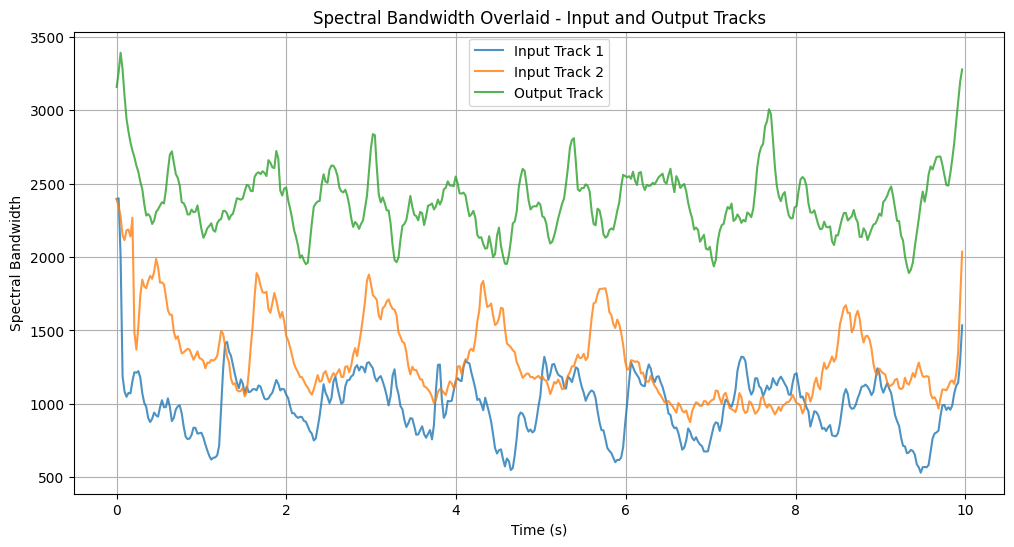

In [20]:
# Calcola la larghezza spettrale
spectral_bandwidth_input1 = librosa.feature.spectral_bandwidth(y=input_track1, sr=sr)[0]
spectral_bandwidth_input2 = librosa.feature.spectral_bandwidth(y=input_track2, sr=sr)[0]
spectral_bandwidth_output = librosa.feature.spectral_bandwidth(y=output_track, sr=sr)[0]

# Visualizza la larghezza spettrale
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(spectral_bandwidth_input1), spectral_bandwidth_input1, label='Input Track 1', alpha=0.8)
plt.plot(librosa.times_like(spectral_bandwidth_input2), spectral_bandwidth_input2, label='Input Track 2', alpha=0.8)
plt.plot(librosa.times_like(spectral_bandwidth_output), spectral_bandwidth_output, label='Output Track', alpha=0.8)

plt.title('Spectral Bandwidth Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Bandwidth')
plt.legend()
plt.grid(True)
plt.show()


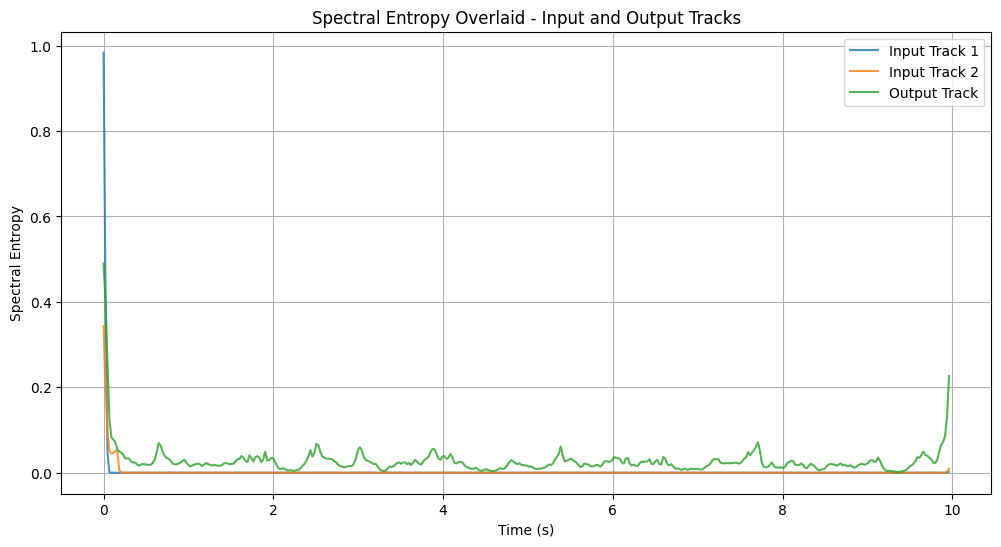

In [21]:
# Calcola lo spettro di entropia
spectral_entropy_input1 = librosa.feature.spectral_flatness(y=input_track1)[0]
spectral_entropy_input2 = librosa.feature.spectral_flatness(y=input_track2)[0]
spectral_entropy_output = librosa.feature.spectral_flatness(y=output_track)[0]

# Visualizza lo spettro di entropia
plt.figure(figsize=(12, 6))

times_input1 = librosa.times_like(spectral_entropy_input1)
times_input2 = librosa.times_like(spectral_entropy_input2)
times_output = librosa.times_like(spectral_entropy_output)

plt.plot(times_input1, spectral_entropy_input1, label='Input Track 1', alpha=0.8)
plt.plot(times_input2, spectral_entropy_input2, label='Input Track 2', alpha=0.8)
plt.plot(times_output, spectral_entropy_output, label='Output Track', alpha=0.8)

plt.title('Spectral Entropy Overlaid - Input and Output Tracks')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Entropy')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume che tu abbia già caricato le tracce audio input_track1, input_track2, output_track
# ...

# Riduci la lunghezza di tutte le tracce al minimo tra di loro per evitare errori
min_length = min(len(input_track1), len(input_track2), len(output_track))
input_track1 = input_track1[:min_length]
input_track2 = input_track2[:min_length]
output_track = output_track[:min_length]

# Calcola le metriche numeriche per traccia 1
mse_input1_output = mean_squared_error(input_track1, output_track)
mae_input1_output = mean_absolute_error(input_track1, output_track)
r2_input1_output = r2_score(input_track1, output_track)

# Calcola le metriche numeriche per traccia 2
mse_input2_output = mean_squared_error(input_track2, output_track)
mae_input2_output = mean_absolute_error(input_track2, output_track)
r2_input2_output = r2_score(input_track2, output_track)

# Stampa le metriche
print(f"Mean Squared Error (MSE) between Input Track 1 and Output Track: {mse_input1_output}")
print(f"Mean Absolute Error (MAE) between Input Track 1 and Output Track: {mae_input1_output}")
print(f"R-squared (R2) between Input Track 1 and Output Track: {r2_input1_output}")

print(f"\nMean Squared Error (MSE) between Input Track 2 and Output Track: {mse_input2_output}")
print(f"Mean Absolute Error (MAE) between Input Track 2 and Output Track: {mae_input2_output}")
print(f"R-squared (R2) between Input Track 2 and Output Track: {r2_input2_output}")


Mean Squared Error (MSE) between Input Track 1 and Output Track: 0.01405414566397667
Mean Absolute Error (MAE) between Input Track 1 and Output Track: 0.09028896689414978
R-squared (R2) between Input Track 1 and Output Track: -2.361390209405568

Mean Squared Error (MSE) between Input Track 2 and Output Track: 0.02015811949968338
Mean Absolute Error (MAE) between Input Track 2 and Output Track: 0.10903593897819519
R-squared (R2) between Input Track 2 and Output Track: -0.9212537348507379


In [23]:
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import explained_variance_score, median_absolute_error

# Calcola metriche numeriche per traccia 1
correlation_coefficient_input1_output, _ = pearsonr(input_track1, output_track)
spearman_rank_coefficient_input1_output, _ = spearmanr(input_track1, output_track)
explained_variance_input1_output = explained_variance_score(input_track1, output_track)
median_absolute_error_input1_output = median_absolute_error(input_track1, output_track)

# Calcola metriche numeriche per traccia 2
correlation_coefficient_input2_output, _ = pearsonr(input_track2, output_track)
spearman_rank_coefficient_input2_output, _ = spearmanr(input_track2, output_track)
explained_variance_input2_output = explained_variance_score(input_track2, output_track)
median_absolute_error_input2_output = median_absolute_error(input_track2, output_track)

# Stampa le metriche
print(f"\nCorrelation Coefficient between Input Track 1 and Output Track: {correlation_coefficient_input1_output}")
print(f"Spearman Rank Coefficient between Input Track 1 and Output Track: {spearman_rank_coefficient_input1_output}")
print(f"Explained Variance between Input Track 1 and Output Track: {explained_variance_input1_output}")
print(f"Median Absolute Error between Input Track 1 and Output Track: {median_absolute_error_input1_output}")

print(f"\nCorrelation Coefficient between Input Track 2 and Output Track: {correlation_coefficient_input2_output}")
print(f"Spearman Rank Coefficient between Input Track 2 and Output Track: {spearman_rank_coefficient_input2_output}")
print(f"Explained Variance between Input Track 2 and Output Track: {explained_variance_input2_output}")
print(f"Median Absolute Error between Input Track 2 and Output Track: {median_absolute_error_input2_output}")



Correlation Coefficient between Input Track 1 and Output Track: -0.015522035418424424
Spearman Rank Coefficient between Input Track 1 and Output Track: -0.016543445687172482
Explained Variance between Input Track 1 and Output Track: -2.361389398574829
Median Absolute Error between Input Track 1 and Output Track: 0.07147017121315002

Correlation Coefficient between Input Track 2 and Output Track: 0.00048120050981917146
Spearman Rank Coefficient between Input Track 2 and Output Track: -0.002946335810333866
Explained Variance between Input Track 2 and Output Track: -0.9212532043457031
Median Absolute Error between Input Track 2 and Output Track: 0.08674018085002899


In [24]:
# Calcola le metriche numeriche per traccia 1
mse_input1_output = mean_squared_error(input_track1, output_track)
mae_input1_output = mean_absolute_error(input_track1, output_track)
r2_input1_output = r2_score(input_track1, output_track)
correlation_coefficient_input1_output, _ = pearsonr(input_track1, output_track)
spearman_rank_coefficient_input1_output, _ = spearmanr(input_track1, output_track)
explained_variance_input1_output = explained_variance_score(input_track1, output_track)
median_absolute_error_input1_output = median_absolute_error(input_track1, output_track)

# Calcola le metriche numeriche per traccia 2
mse_input2_output = mean_squared_error(input_track2, output_track)
mae_input2_output = mean_absolute_error(input_track2, output_track)
r2_input2_output = r2_score(input_track2, output_track)
correlation_coefficient_input2_output, _ = pearsonr(input_track2, output_track)
spearman_rank_coefficient_input2_output, _ = spearmanr(input_track2, output_track)
explained_variance_input2_output = explained_variance_score(input_track2, output_track)
median_absolute_error_input2_output = median_absolute_error(input_track2, output_track)

# Stampa le metriche numeriche
print(f"\nMean Squared Error (MSE) between Input Track 1 and Output Track: {mse_input1_output}")
print(f"Mean Absolute Error (MAE) between Input Track 1 and Output Track: {mae_input1_output}")
print(f"R-squared (R2) between Input Track 1 and Output Track: {r2_input1_output}")
print(f"Correlation Coefficient between Input Track 1 and Output Track: {correlation_coefficient_input1_output}")
print(f"Spearman Rank Coefficient between Input Track 1 and Output Track: {spearman_rank_coefficient_input1_output}")
print(f"Explained Variance between Input Track 1 and Output Track: {explained_variance_input1_output}")
print(f"Median Absolute Error between Input Track 1 and Output Track: {median_absolute_error_input1_output}")

print(f"\nMean Squared Error (MSE) between Input Track 2 and Output Track: {mse_input2_output}")
print(f"Mean Absolute Error (MAE) between Input Track 2 and Output Track: {mae_input2_output}")
print(f"R-squared (R2) between Input Track 2 and Output Track: {r2_input2_output}")
print(f"Correlation Coefficient between Input Track 2 and Output Track: {correlation_coefficient_input2_output}")
print(f"Spearman Rank Coefficient between Input Track 2 and Output Track: {spearman_rank_coefficient_input2_output}")
print(f"Explained Variance between Input Track 2 and Output Track: {explained_variance_input2_output}")
print(f"Median Absolute Error between Input Track 2 and Output Track: {median_absolute_error_input2_output}")


Mean Squared Error (MSE) between Input Track 1 and Output Track: 0.01405414566397667
Mean Absolute Error (MAE) between Input Track 1 and Output Track: 0.09028896689414978
R-squared (R2) between Input Track 1 and Output Track: -2.361390209405568
Correlation Coefficient between Input Track 1 and Output Track: -0.015522035418424424
Spearman Rank Coefficient between Input Track 1 and Output Track: -0.016543445687172482
Explained Variance between Input Track 1 and Output Track: -2.361389398574829
Median Absolute Error between Input Track 1 and Output Track: 0.07147017121315002

Mean Squared Error (MSE) between Input Track 2 and Output Track: 0.02015811949968338
Mean Absolute Error (MAE) between Input Track 2 and Output Track: 0.10903593897819519
R-squared (R2) between Input Track 2 and Output Track: -0.9212537348507379
Correlation Coefficient between Input Track 2 and Output Track: 0.00048120050981917146
Spearman Rank Coefficient between Input Track 2 and Output Track: -0.00294633581033386